Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.


In [262]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import seaborn as sns

# QUESTION 1 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.


In [263]:
df = pd.read_csv("cubic_zirconia.csv")
df.head(5)


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [264]:
df.columns


Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [265]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [266]:
df.shape #shape

(26967, 11)

In [267]:
df.info() # null values,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [268]:
#dropping the no use serial number column.
df_1=df.drop('Unnamed: 0', axis=1)

In [269]:
df_1.describe().T #all different variables

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [270]:
df_1.describe(include=['object'])

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


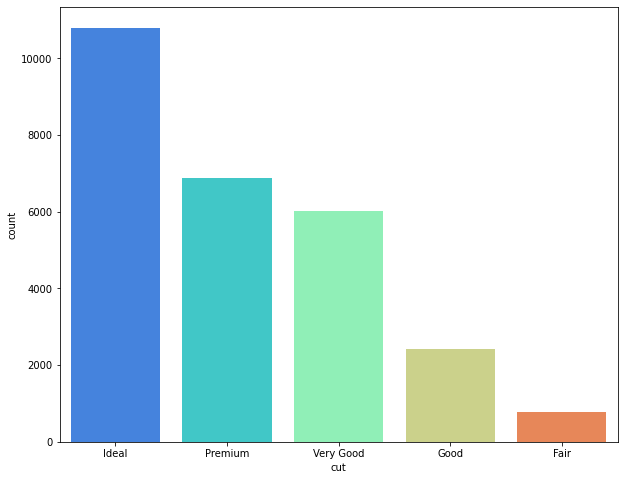

In [271]:
# Univariate analysis for the objective variables.
plt.figure(figsize=(10,8))
sns.countplot(df_2['cut'], palette='rainbow');

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


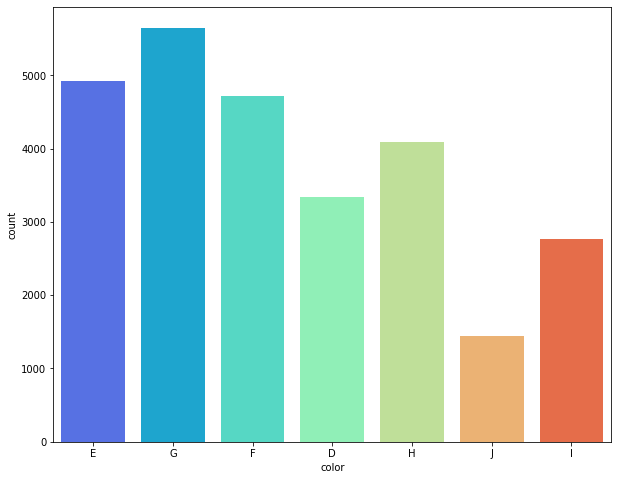

In [272]:
plt.figure(figsize=(10,8))
sns.countplot(df_2['color'], palette='rainbow');

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


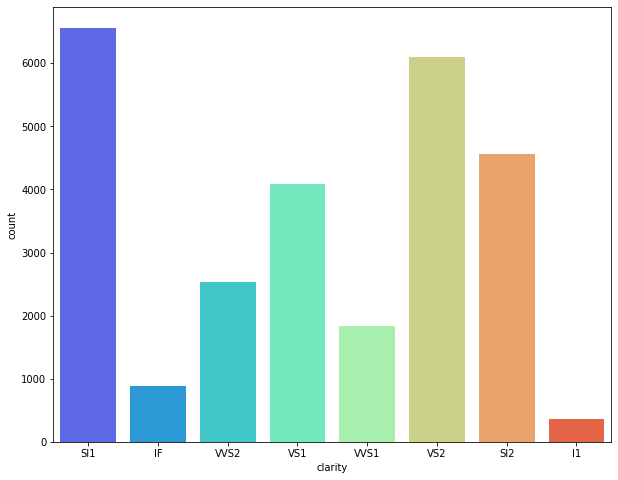

In [273]:
plt.figure(figsize=(10,8))
sns.countplot(df_2['clarity'], palette='rainbow');

# EDA and duplicate values

In [274]:
#number of duplicate records.
Duplicates = df_2.duplicated()
print('Number of duplicate rows = %d' % (Duplicates.sum()))


Number of duplicate rows = 0


In [275]:
df_2.drop_duplicates(inplace=True)
df_2.shape

(26925, 10)

In [276]:
#MIssing values
df_2.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

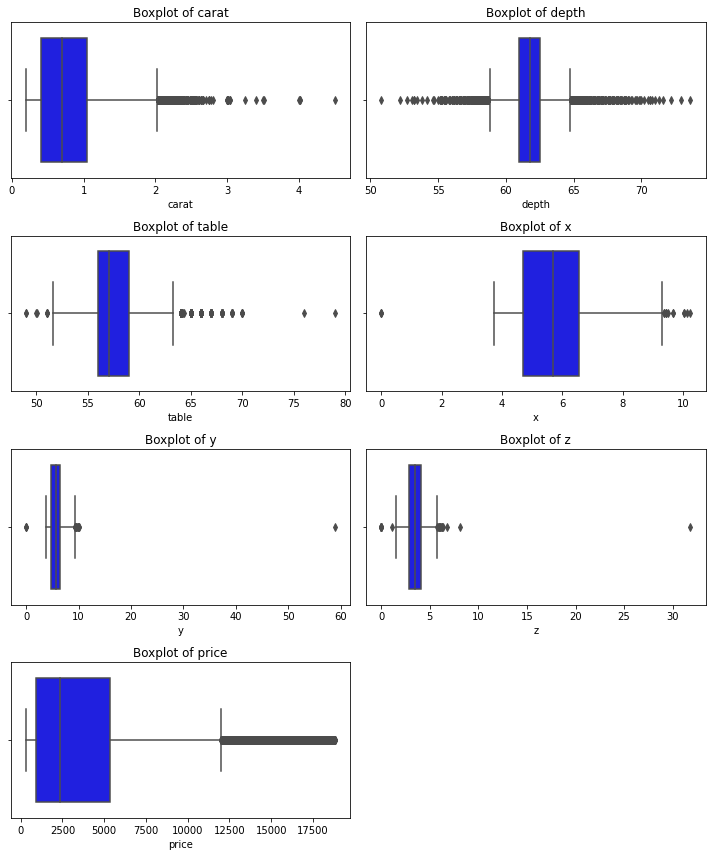

In [277]:

#Outlier checks.
col = df[['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]]

plt.figure(figsize = (10,12))
feature_list = col.columns
for i in range(len(feature_list)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=col[feature_list[i]], data=col, orient='h', color='b')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()


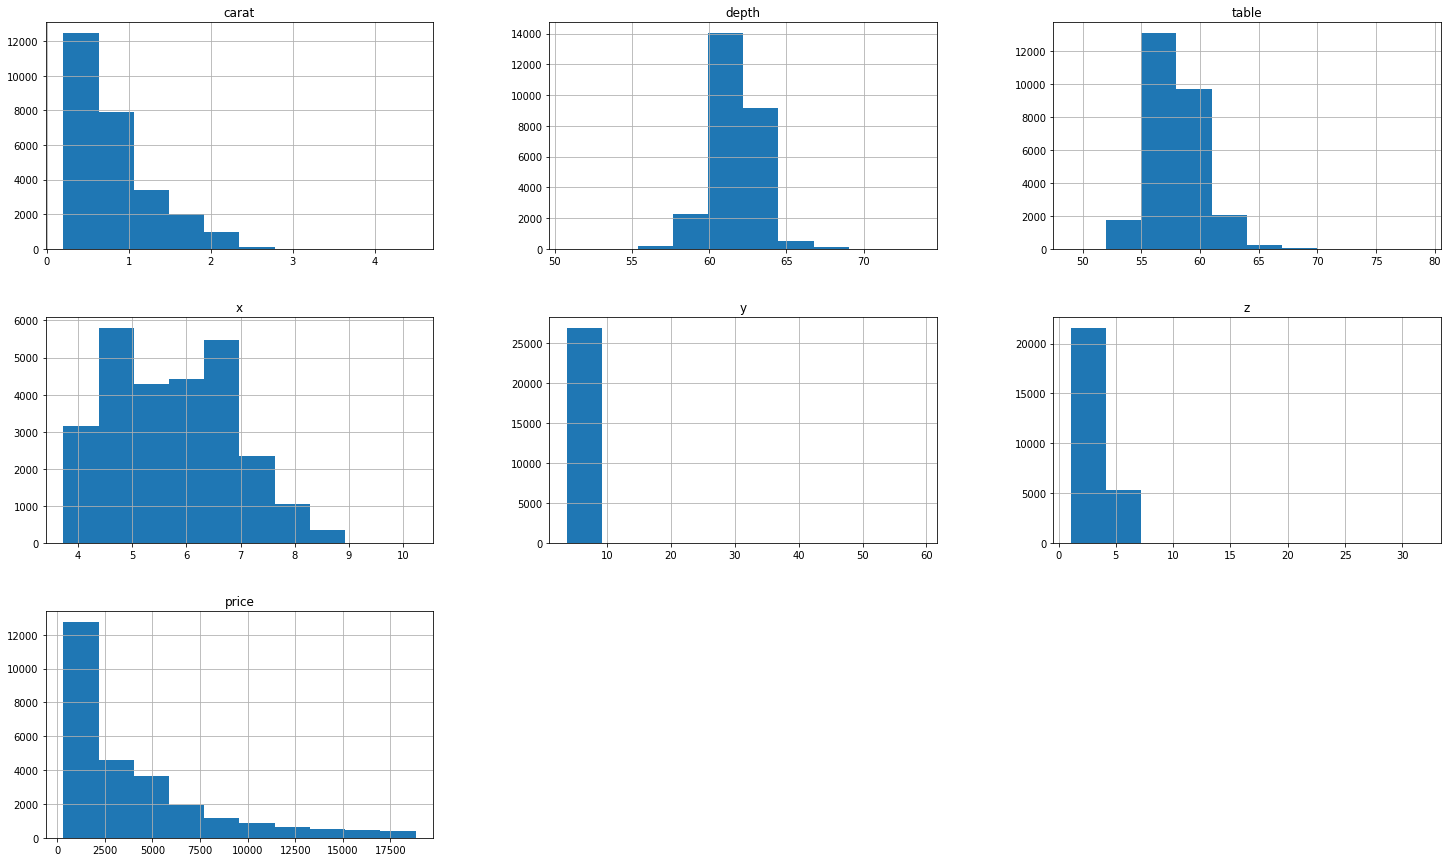

In [278]:

df_2.hist(figsize=(25,15));

In [279]:
df_2.skew()   # to measure the skeweness of every attribute.
# (1).There is significant amount of outlier present in some variable. 
# (2) We can see that the distribution of some quantitative features like 
# "carat" and the target feature "price" are heavily "right-skewed".

carat    1.114871
depth   -0.025042
table    0.764890
x        0.402010
y        3.888607
z        2.639529
price    1.619055
dtype: float64

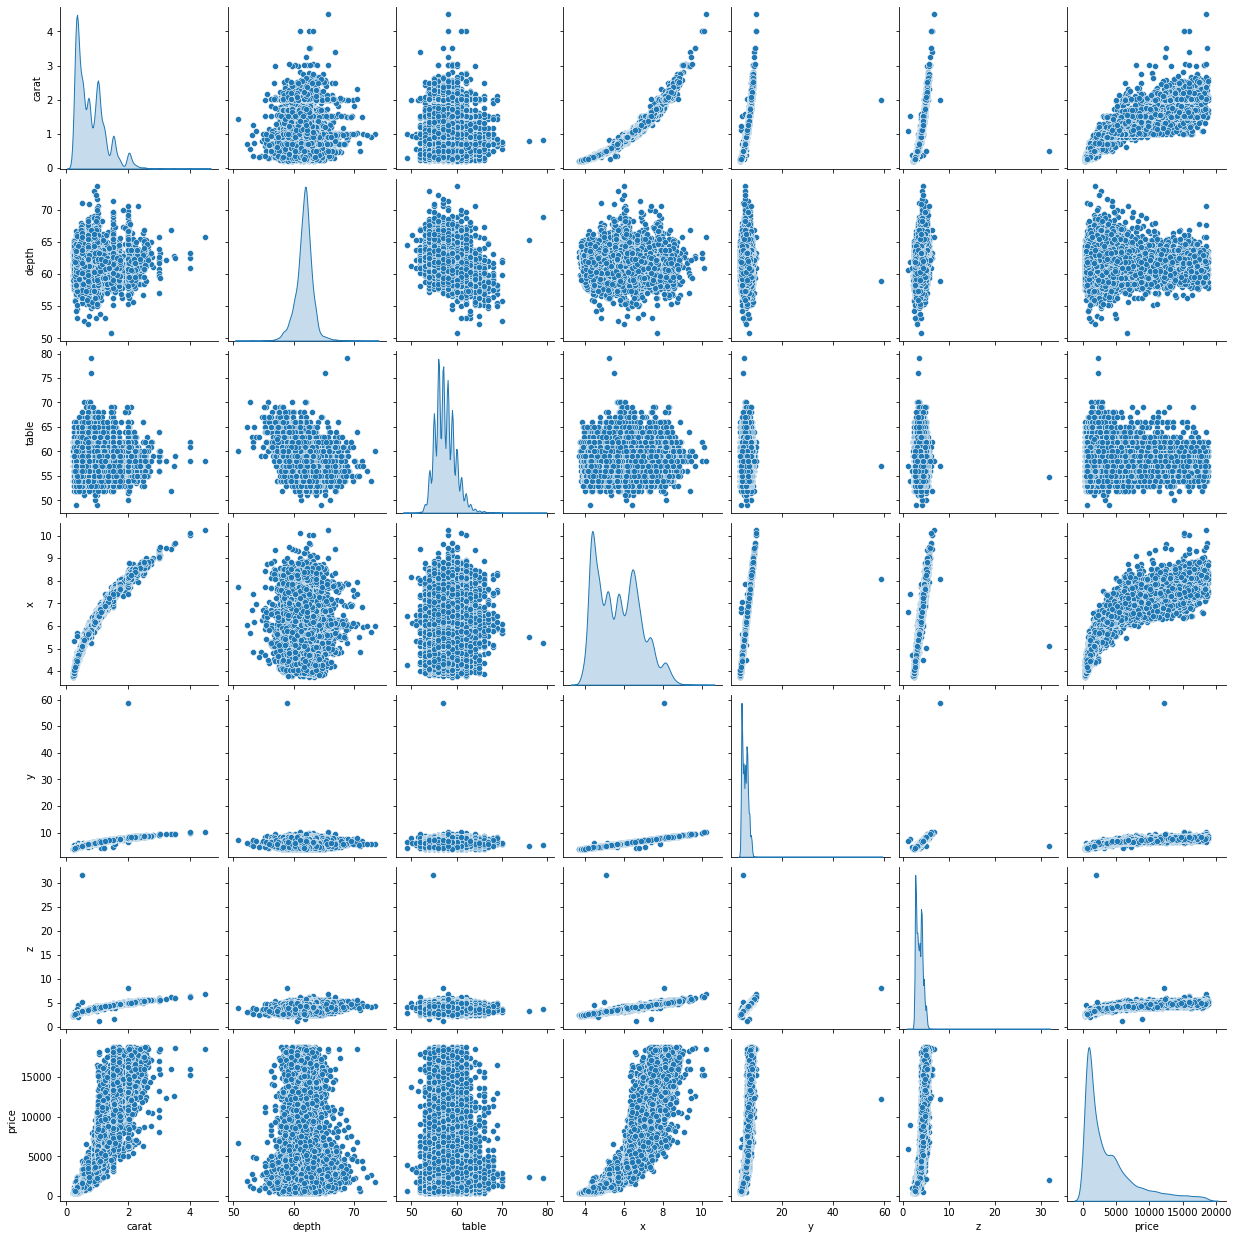

In [280]:
# Bivariate analysis
df_bivariate = ( df_2[cols])
sns.pairplot(df_bivariate, diag_kind='kde')  
plt.show()

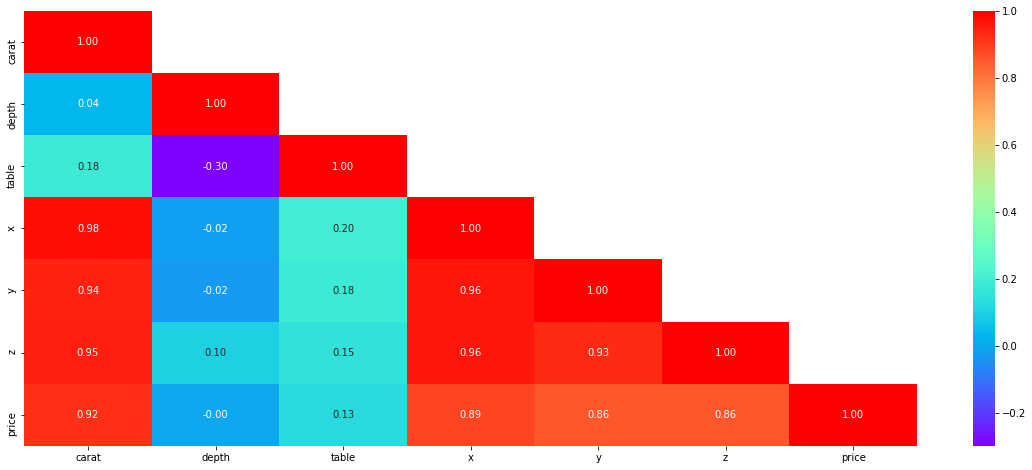

In [281]:
# Correlation heat map
plt.figure(figsize=(20,8))
sns.heatmap(df_2.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df_2.corr(),+1))
plt.show()

In [282]:
# Each feature has price effect that differentiates the cost for diamonds.
correlations = df_2.corr()
correlations["price"].sort_values(ascending=False)
# It can be inferred that most features correlate with the price of Diamond. The notable exception is 
# "depth" which has a negligible correlation (<1%).

price    1.000000
carat    0.922400
x        0.887467
y        0.857255
z        0.855775
table    0.126967
depth   -0.002736
Name: price, dtype: float64

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


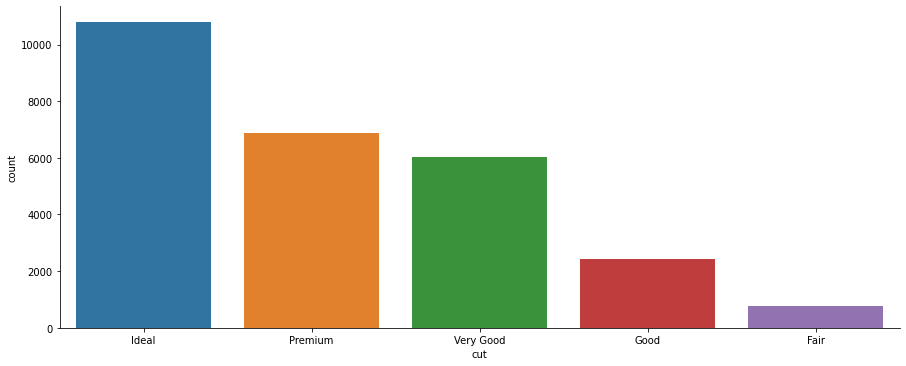

In [283]:
# EDA for Categorical variable.
sns.catplot('cut', data=df_2, kind='count',aspect=2.5)

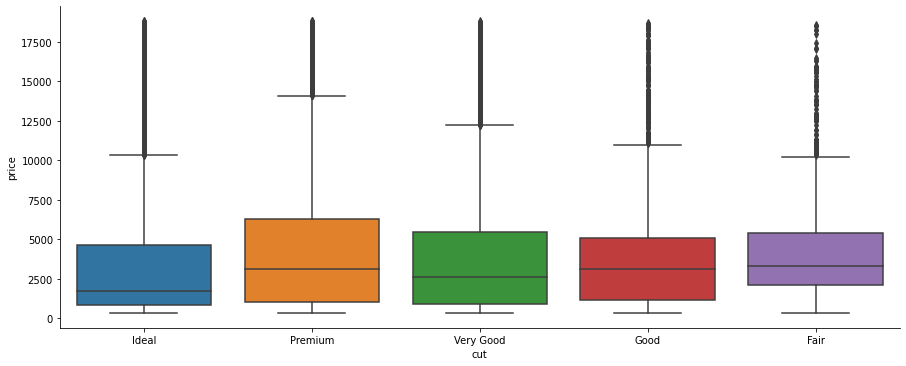

In [284]:
sns.catplot(x='cut', y='price', kind='box', data=df_2, aspect=2.5)

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


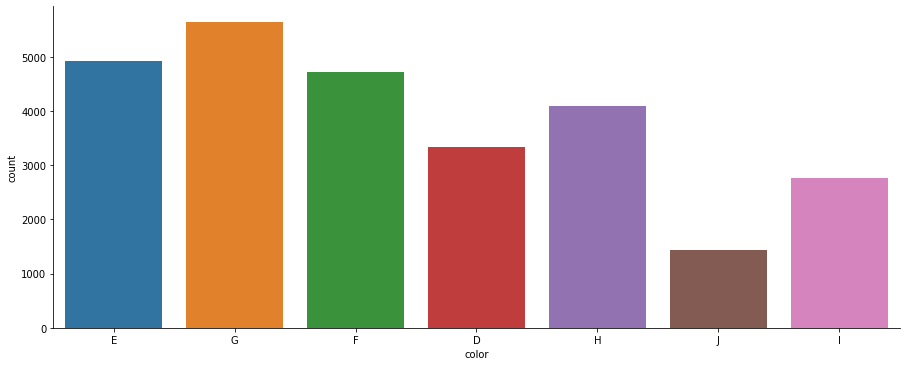

In [285]:
sns.catplot('color', kind='count', data=df_2, aspect=2.5)

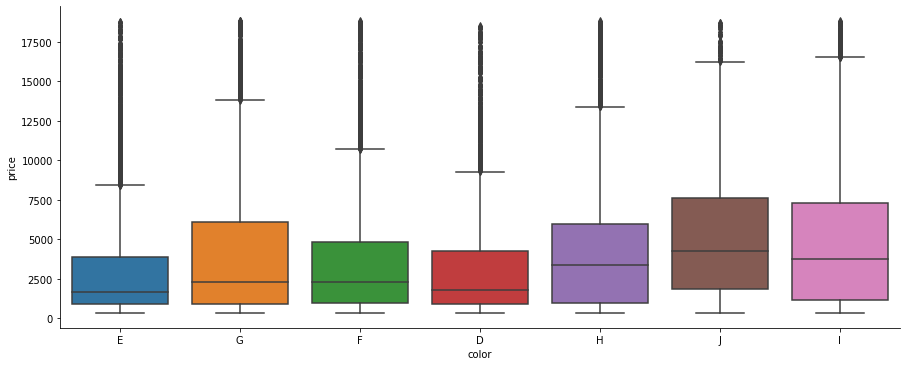

In [286]:
sns.catplot(x='color', y='price', data=df_2, aspect =2.5, kind='box')

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


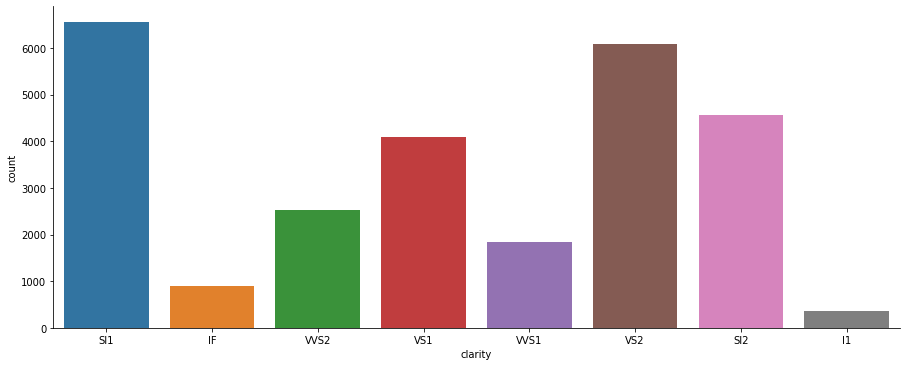

In [287]:
sns.catplot('clarity', data=df_2, kind='count',aspect=2.5)

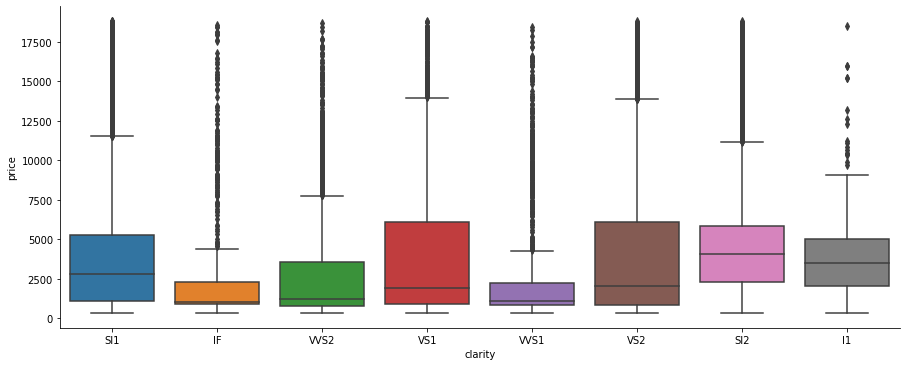

In [288]:

sns.catplot(x='clarity', y='price', data=df_2, aspect =2.5, kind='box')

Observation on 'clarity': The Diamonds clarity with VS1 & VS2 are the most Expensive.

The inferences drawn from the above Exploratory Data analysis:
Observation-1:
(1).'Price' is the target variable while all others are the predictors. (2).The data set contains 26967 row, 11 column. (3).In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable. (4)The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

Observation-2: (1).On the given data set the the mean and median values does not have much differenc. (2).We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries. (3).There are three object data type 'cut', 'color' and 'clarity'.

Observation-3: we can observe there are 697 missing value in the depth column. There are some duplicate row present. (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. So on this case we have dropped the duplicated row.

Observation-4: :
There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

Observation-5:
It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation (~1%). Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [304]:
df = pd.read_csv("cubic_zirconia.csv")
df.head()
#dropping the no use serial number column.
df=df.drop('Unnamed: 0', axis=1)

In [305]:
# As we have checked there Are some missing values.


df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [306]:
df.median()

carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
price    2375.00
dtype: float64

In [307]:
# Imputing missing values
df_2= df_2.fillna(df_2.median())

In [308]:
df_2.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

(26958, 10)

In [310]:
# Checking for the values which are equal to zero.
print("Number of rows with x == 0: {} ".format((df.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df.depth==0).sum()))
   

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [312]:
# #Firstly want to drop the dimensionless cubics.
df_1 = df_1.drop(df_1[df_1['x']==0].index)
df_1 = df_1.drop(df_1[df_1['y']==0].index)
df_1 = df_1.drop(df_1[df_1['z']==0].index)
df_1.shape

(26958, 10)

In [314]:
# Checking for the values which are equal to zero after removing the dimentionless cubics.
print("Number of rows with x == 0: {} ".format((df_1.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df_1.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df_1.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df_1.depth==0).sum()))

Number of rows with x == 0: 0 
Number of rows with y == 0: 0 
Number of rows with z == 0: 0 
Number of rows with depth == 0: 0 


As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries

In [316]:

# Outlier treatments..
col = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  


In [318]:
for column in df_1[cols].columns:
    lr,ur=remove_outlier(df_1[column])
    df_1[column]=np.where(df_1[column]>ur,ur,df_1[column])
    df_1[column]=np.where(df_1[column]<lr,lr,df_1[column])


C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


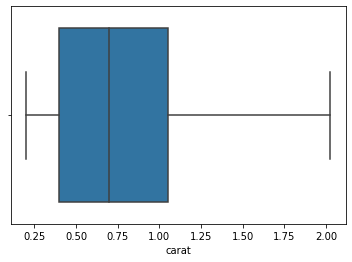

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


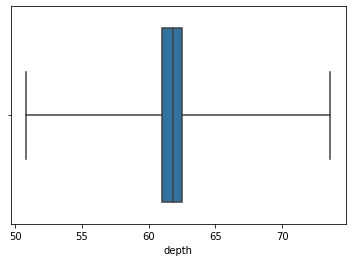

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


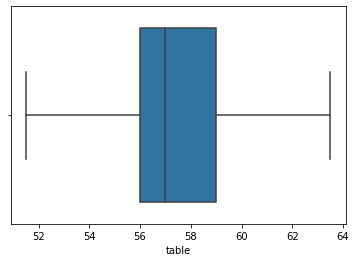

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


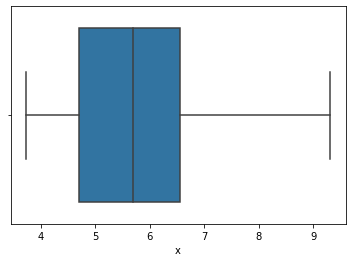

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


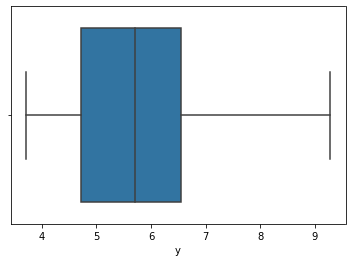

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


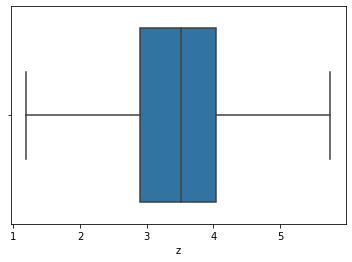

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


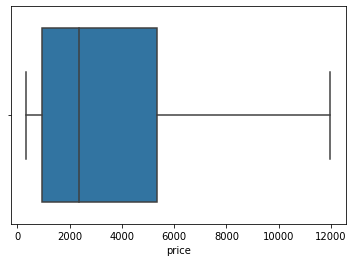

In [323]:
col = ['carat','depth', 'table', 'x', 'y', 'z',
       'price' ]
for i in col:
    sns.boxplot(df_1[i],whis=10)
    plt.show()


In [ ]:
# Is scalling necessary for the case study..


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [324]:
# Geting unique counts of all Objects.
print('cut\n',df_1.cut.value_counts())
print('\n')
print('color\n',df_1.color.value_counts())
print('\n')
print('clarity\n',df_1.clarity.value_counts())
print('\n')

cut
 Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64


color
 G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64


clarity
 SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64




In [367]:
# Converting objects to categorical codes


df_1['cut'].replace(to_replace='Fair', value=1, inplace=True)
df_1['cut'].replace(to_replace='Good', value=2, inplace=True)
df_1['cut'].replace(to_replace='Very Good', value=3, inplace=True)
df_1['cut'].replace(to_replace='Premium', value=4, inplace=True)
df_1['cut'].replace(to_replace='Ideal', value=5, inplace=True)

In [368]:


df_1['color'].replace(to_replace='D', value=1, inplace=True)
df_1['color'].replace(to_replace='E', value=2, inplace=True)
df_1['color'].replace(to_replace='F', value=3, inplace=True)
df_1['color'].replace(to_replace='G', value=4, inplace=True)
df_1['color'].replace(to_replace='H', value=5, inplace=True)
df_1['color'].replace(to_replace='I', value=6, inplace=True)
df_1['color'].replace(to_replace='J', value=7, inplace=True)

In [369]:


df_1['clarity'].replace(to_replace='IF', value=1, inplace=True)
df_1['clarity'].replace(to_replace='VVS1', value=2, inplace=True)
df_1['clarity'].replace(to_replace='VVS2', value=3, inplace=True)
df_1['clarity'].replace(to_replace='VS1', value=4, inplace=True)
df_1['clarity'].replace(to_replace='VS2', value=5, inplace=True)
df_1['clarity'].replace(to_replace='SI1', value=6, inplace=True)
df_1['clarity'].replace(to_replace='SI2', value=7, inplace=True)
df_1['clarity'].replace(to_replace='I1', value=8, inplace=True)


In [370]:
# Converting the data types from categorical to numeric/float.
df_1['cut'] = df_1['cut'].astype('float64')
df_1['color'] = df_1['color'].astype('float64')
df_1['clarity'] = df_1['clarity'].astype('float64')

In [372]:
df_1.dtypes # Successfully converted the values from categorical to numeric.

carat      float64
cut        float64
color      float64
clarity    float64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [373]:
df_1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65,779.0
5,1.02,4.0,6.0,3.0,61.5,56.0,6.46,6.49,3.99,9502.0
6,1.01,1.0,2.0,2.0,63.7,60.0,6.35,6.30,4.03,4836.0
7,0.50,3.0,5.0,2.0,61.5,62.0,5.09,5.06,3.12,1415.0
8,1.21,1.0,2.0,2.0,63.8,63.5,6.72,6.63,4.26,5407.0
9,0.35,4.0,4.0,3.0,60.5,57.0,4.52,4.60,2.76,706.0


In [374]:
# Train - test SPLIT:-
# Copy all the predictor variables into X dataframe
X = df_1.drop('price', axis=1)

# Copy target into the y dataframe.This is the dependent variable
y = df_1[['price']]
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [375]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [376]:
from sklearn.model_selection import train_test_split
# Splitting function to split the train and test set.
# # Splitting training and test set as 70:30 ratio respectively. 
df_1.dropna(axis=0, inplace=True)

In [378]:
y = df_1[['price']]
x = df_1.drop('price',axis=1)

In [379]:
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,4.0,5.0,2.0,62.1,58.0,4.27,4.29,2.66
1,0.33,3.0,3.0,7.0,60.8,58.0,4.42,4.46,2.70
2,0.90,2.0,5.0,5.0,62.2,60.0,6.04,6.12,3.78
3,0.42,4.0,4.0,4.0,61.6,56.0,4.82,4.80,2.96
4,0.31,4.0,4.0,6.0,60.4,59.0,4.35,4.43,2.65


In [380]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [381]:
print(x.shape)
print(y.shape)

(26261, 9)
(26261, 1)


In [382]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [383]:
from sklearn.linear_model import LinearRegression

In [384]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [385]:
model1.coef_

array([[ 8909.40089669,   105.52763837,   271.99355883,   427.61438043,
           53.34026922,   -13.44190594, -1234.84984774,  1723.65447276,
        -1455.64667992]])

In [386]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model1.coef_[0][idx]))

The coefficient for carat is 8909.400896689896
The coefficient for cut is 105.5276383676879
The coefficient for color is 271.9935588326712
The coefficient for clarity is 427.61438043247085
The coefficient for depth is 53.34026921758545
The coefficient for table is -13.441905940572202
The coefficient for x is -1234.8498477426642
The coefficient for y is 1723.6544727565179
The coefficient for z is -1455.6466799234004


In [387]:
model1.intercept_

array([-6050.99917756])

In [388]:
model1.score(x_train, y_train)*100

93.12382609355447

In [389]:
model1.score(x_test, y_test)*100

93.0404255507127

In [390]:
ytrain_predict = model1.predict(x_train)
ytest_predict = model1.predict(x_test)

In [391]:
from sklearn.metrics import mean_squared_error, r2_score

In [392]:
round(mean_squared_error(y_test, ytest_predict),2)

853708.99

In [393]:
r2_score(y_test, ytest_predict)

0.9304042555071269

In [394]:
print(np.sqrt(mean_squared_error(y_test, ytest_predict)))

923.9637393955937


In [395]:
print('The co-efficients:', model1.coef_)
print('The intercept:', model1.intercept_)
print('Mean Squared Error (MSE):', round(mean_squared_error(y_test, ytest_predict),2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, ytest_predict)))
print('Co-efficient of Determination (r-square) on the train data:', r2_score(y_train, ytrain_predict))
print('Co-efficient of Determination (r-square) on the test data:', r2_score(y_test, ytest_predict))

The co-efficients: [[ 8909.40089669   105.52763837   271.99355883   427.61438043
     53.34026922   -13.44190594 -1234.84984774  1723.65447276
  -1455.64667992]]
The intercept: [-6050.99917756]
Mean Squared Error (MSE): 853708.99
Root Mean Squared Error (RMSE): 923.9637393955937
Co-efficient of Determination (r-square) on the train data: 0.9312382609355447
Co-efficient of Determination (r-square) on the test data: 0.9304042555071269


C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


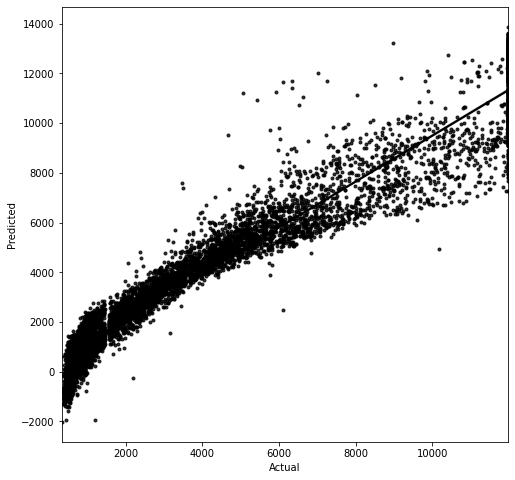

In [396]:
plt.figure(figsize=(8,8))
sns.regplot(y_test['price'], ytest_predict, color='black', marker='.')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Multiple Linear Regression using Stats Model


Model 2

In [397]:
import statsmodels.formula.api as smf

In [398]:
formula = 'price ~ carat+color+clarity+depth+table+x+y+z'

In [405]:
model2 = smf.ols(formula=formula, data=df_1).fit()

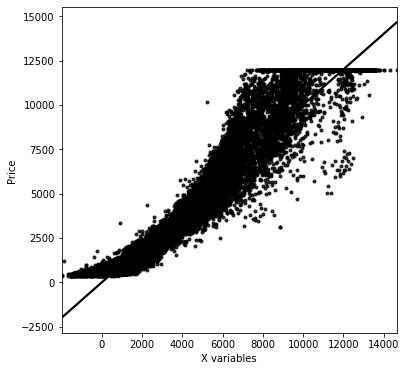

In [406]:
plt.figure(figsize=(6,6))
sns.regplot(x=model2.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

In [401]:
print(model2.params)

Intercept    -578.573369
carat        8856.230986
color         273.706315
clarity       441.155739
depth          -4.508633
table         -44.213788
x           -1031.575783
y            1290.323494
z           -1033.099422
dtype: float64


In [402]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 4.378e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:31:00   Log-Likelihood:            -2.1635e+05
No. Observations:               26261   AIC:                         4.327e+05
Df Residuals:                   26252   BIC:                         4.328e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -578.5734    725.517     -0.797      0.4

# Multiple Linear Regression using Stats Model


Model 3

In [403]:
formula = 'price ~ carat+color+clarity+depth+table+x'

In [407]:
model3 = smf.ols(formula=formula, data=df_1).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 5.803e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:37:32   Log-Likelihood:            -2.1642e+05
No. Observations:               26261   AIC:                         4.329e+05
Df Residuals:                   26254   BIC:                         4.329e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3852.7264    401.110      9.605      0.0

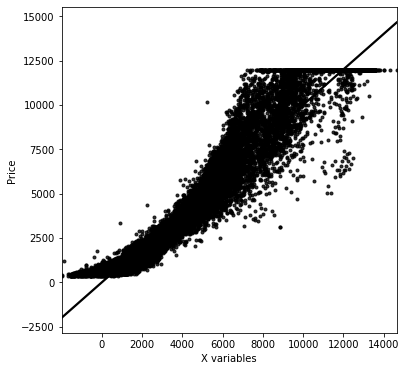

In [408]:
plt.figure(figsize=(6,6))
sns.regplot(x=model3.fittedvalues, y=y, color='black', marker='.')
plt.xlabel('X variables')
plt.ylabel('Price')
plt.show()

# Multiple Linear Regression using Stats Model


Model 4


In [409]:
formula = 'price ~ carat+x'

In [417]:
model4 = smf.ols(formula=formula, data=df_1).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 6.910e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:41:08   Log-Likelihood:            -2.1652e+05
No. Observations:               26261   AIC:                         4.330e+05
Df Residuals:                   26255   BIC:                         4.331e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1171.3370    352.120      3.327      0.0

# Multiple Linear Regression using Stats Model
Model 5

In [411]:
formula = 'price ~ carat+color+clarity+depth+table'

In [414]:
model5 = smf.ols(formula=formula, data=df_1).fit()
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 6.910e+04
Date:                Sun, 20 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:40:03   Log-Likelihood:            -2.1652e+05
No. Observations:               26261   AIC:                         4.330e+05
Df Residuals:                   26255   BIC:                         4.331e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1171.3370    352.120      3.327      0.0

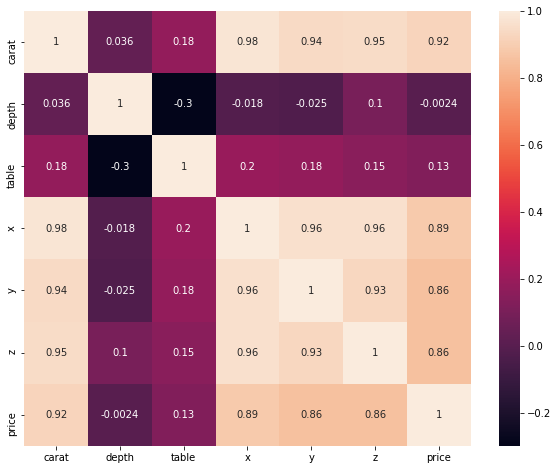

In [416]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

# Checking Multicollinearity using Variance Inflation Factor (VIF)

In [418]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [419]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [420]:
i=0
for column in x.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 123.4352660994068
cut ---> 10.51503773050019
color ---> 5.5596202385955875
clarity ---> 5.465442774083856
depth ---> 1272.550507399069
table ---> 902.0106597342918
x ---> 10758.780860893887
y ---> 9463.361634778345
z ---> 4026.439239231249


# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
# Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.


In [426]:
for i,j in np.array(model2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3852.73) * Intercept + (8894.7) * carat + (274.04) * color + (443.55) * clarity + (-71.41) * depth + (-48.05) * table + (-399.42) * x + 

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [620]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings


In [809]:
holi_df = pd.read_csv("Holiday_Package.csv")
holi_df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [810]:
holi_df = holi_df.drop("Unnamed: 0",axis = 1)
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [811]:
holi_df.shape

(872, 7)

In [812]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
# There are 872 rows and 7 columns
# There are no null values 
# There are 5 integer and 2 object variables

In [813]:
holi_df.describe(include = "all")

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [814]:
holi_df.isnull().sum() #No null values

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [815]:
dups = holi_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) #No duplicate values

Number of duplicate rows = 0


In [818]:
holi_df.foreign.value_counts() #Unique counts one by one objects , 

no     656
yes    216
Name: foreign, dtype: int64

In [819]:
holi_df.Holliday_Package.value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [820]:
holi_df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


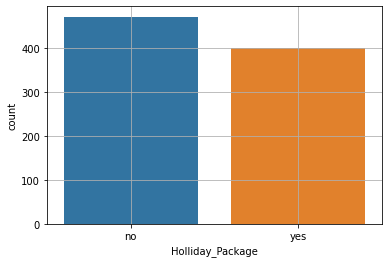

In [823]:
sns.countplot(holi_df.Holliday_Package)

plt.grid()

plt.show() # 410 opted for holiday packages, 471 not opted for holiday packages.

Text(0.5, 1.0, 'no_older_children vs Holliday_Package')

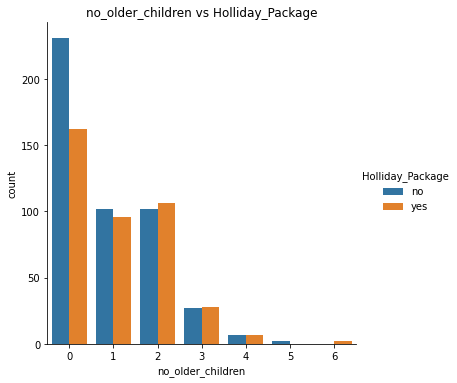

In [824]:
sns.catplot(x="no_older_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_older_children vs Holliday_Package")

Text(0.5, 1.0, 'no_young_children vs Holliday_Package')

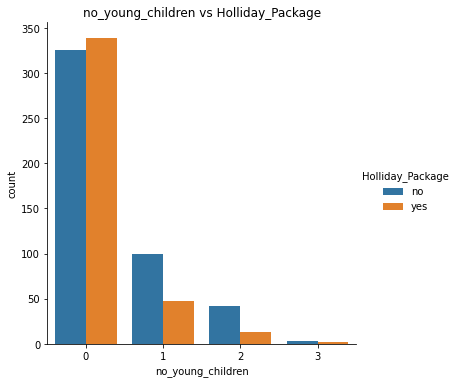

In [825]:
sns.catplot(x="no_young_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_young_children vs Holliday_Package") # Just a few employees has opted for packeage with clouds. 

Text(0.5, 1.0, 'no_young_children vs Holliday_Package')

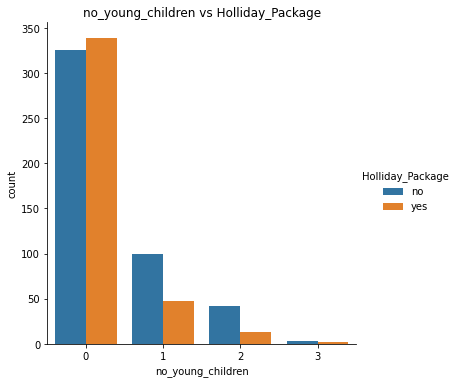

In [826]:
sns.catplot(x="no_young_children", kind="count",hue='Holliday_Package', data=holi_df)
plt.title("no_young_children vs Holliday_Package")

Text(0.5, 1.0, 'foreign & Salary')

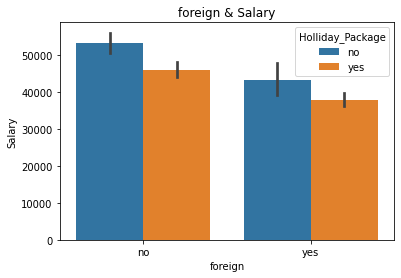

In [827]:
#plt.figure(figsize=(15,5))
ax = sns.barplot(x='foreign', y='Salary', hue='Holliday_Package',data=holi_df)
plt.title("foreign & Salary")

C:\Users\rmand\anaconda3\lib\site-packages\seaborn\categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'foreign vs Holliday_Package')

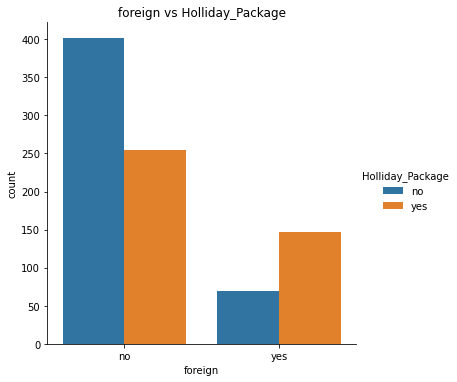

In [828]:
#some foreign employers paid less salary than the other employees
#plt.figure(figsize=(15,7))
ax = sns.catplot(x='foreign', kind='count',data=holi_df,hue='Holliday_Package',ax=ax)
plt.title("foreign vs Holliday_Package")

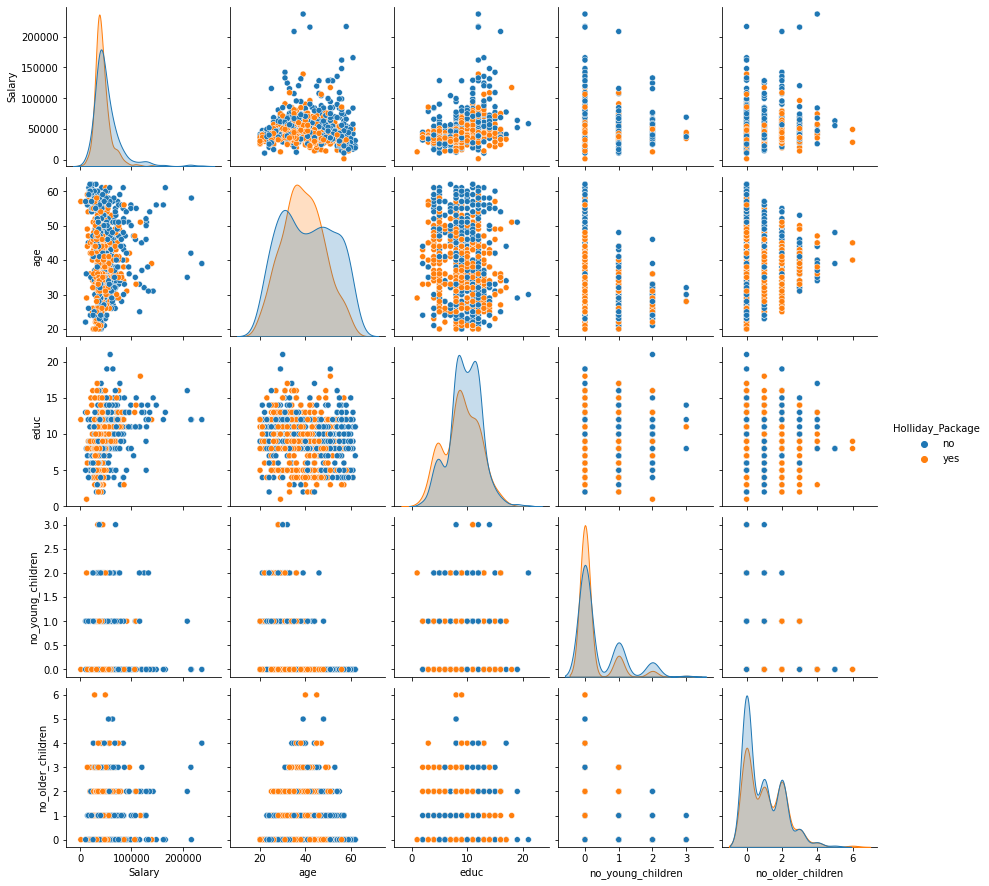

In [829]:
#most of foreign employees are not opted for holiday package
sns.pairplot(holi_df , hue='Holliday_Package' , diag_kind = 'kde')

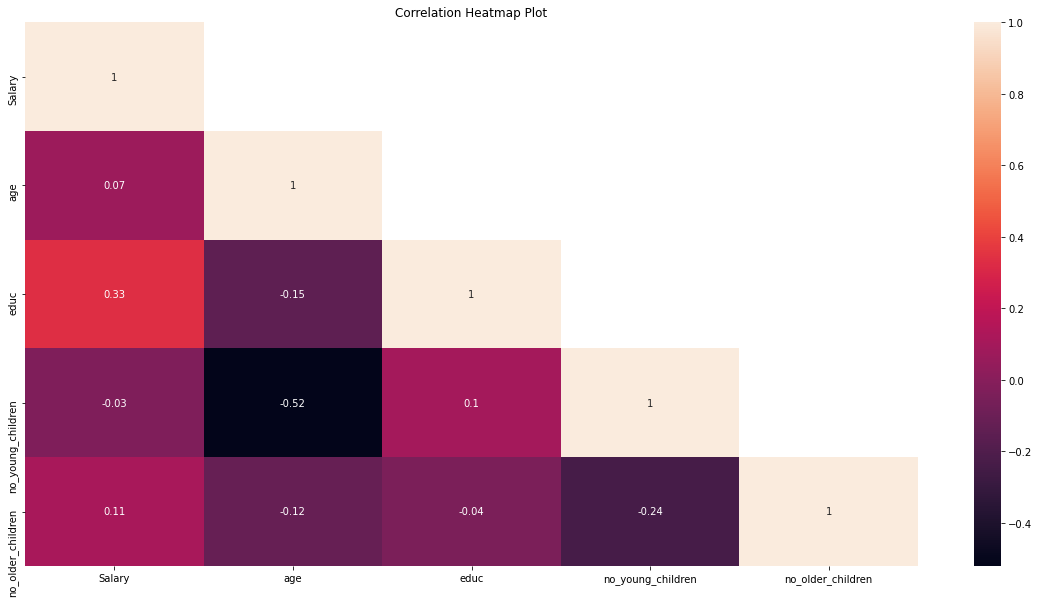

In [830]:
plt.figure(figsize=(20,10))
sns.heatmap(round(holi_df.corr(),2), annot=True,mask=np.triu(holi_df.corr(),+1));
plt.title('Correlation Heatmap Plot')
plt.show()

In [831]:
holi_df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

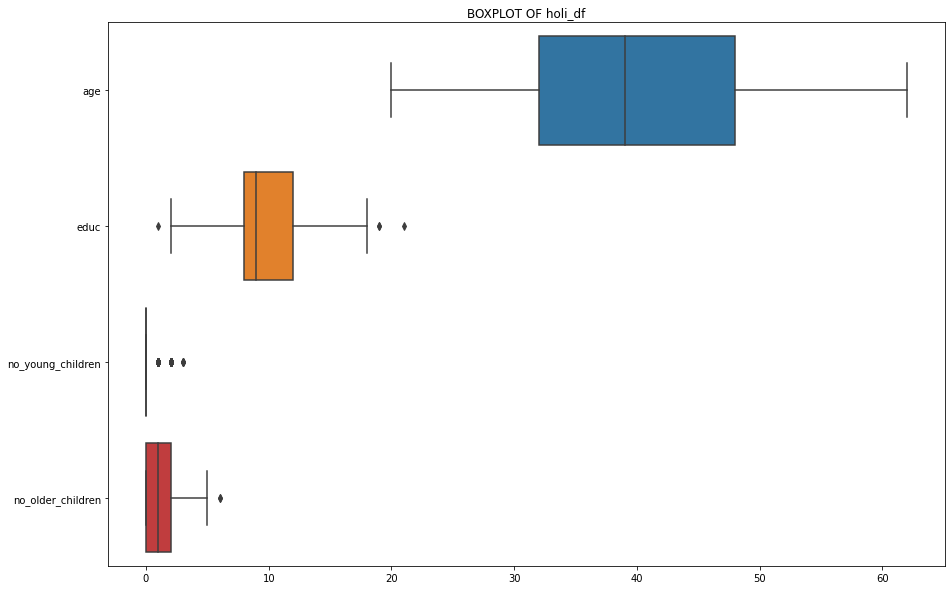

In [832]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT OF holi_df')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

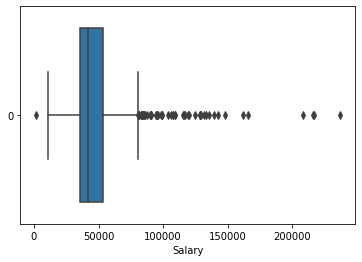

In [833]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show() #except age ,all other variables have Outliers 

In [834]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [835]:
dtypes=holi_df.dtypes[(holi_df.dtypes!= 'object')].index
for column in holi_df[dtypes].columns:
    lr,ur=remove_outlier(holi_df[column])
    holi_df[column]=np.where(holi_df[column]>ur,ur,holi_df[column])
    holi_df[column]=np.where(holi_df[column]<lr,lr,holi_df[column])

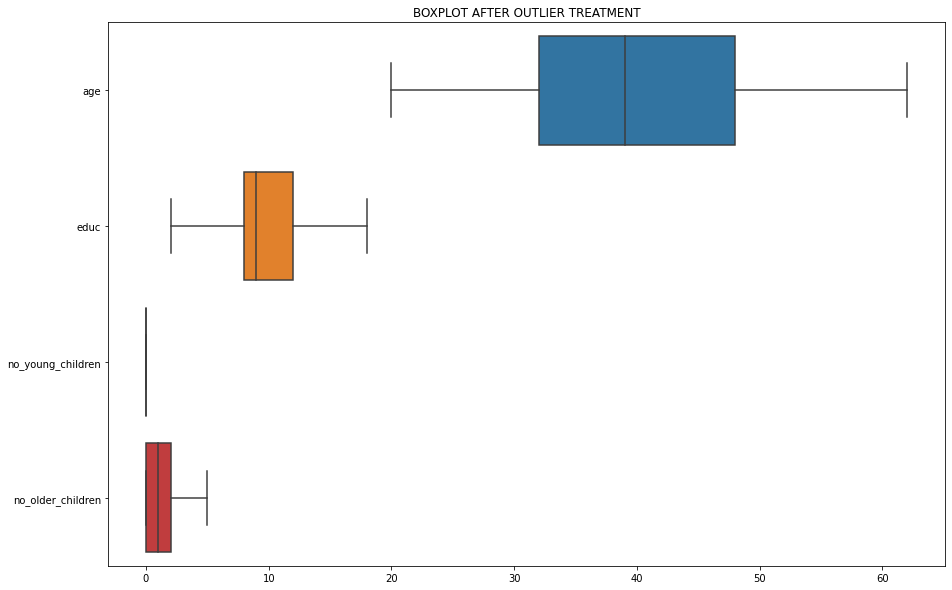

In [836]:
plt.subplots(figsize=(15,10))
plt.title('BOXPLOT AFTER OUTLIER TREATMENT')
sns.boxplot(data=holi_df[['Holliday_Package', 'age', 'educ', 'no_young_children','no_older_children', 'foreign']],orient="h")
plt.show()

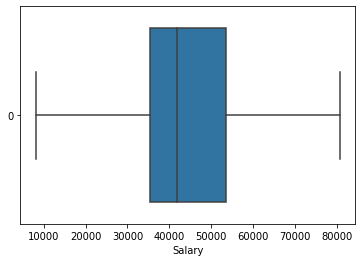

In [837]:
sns.boxplot(data = holi_df[("Salary")],orient = "h")
plt.xlabel("Salary")
plt.show() #After outlier treatment all other outliers removed.

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [838]:
for feature in holi_df.columns: 
    if holi_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(holi_df[feature].unique()))
        print(pd.Categorical(holi_df[feature].unique()).codes)
        holi_df[feature] = pd.Categorical(holi_df[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [842]:
#Codes are an array of integers which are the positions of the actual values in the categories array.
# here Holliday_Package and foreign are categorical variables are now converted into integers using codes
holi_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.0,30.0,8.0,0.0,1.0,0
1,1,37207.0,45.0,8.0,0.0,1.0,0
2,0,58022.0,46.0,9.0,0.0,0.0,0
3,0,66503.0,31.0,11.0,0.0,0.0,0
4,0,66734.0,44.0,12.0,0.0,2.0,0


In [843]:
holi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(5), int8(2)
memory usage: 35.9 KB


# Train/ Test split

In [844]:
X = holi_df.drop("Holliday_Package",axis = 1)
y = holi_df[["Holliday_Package"]]

In [845]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [846]:
print('The training set for the independent variables:',X_train.shape)
print('The training set for the dependent variable:',y_train.shape)
print('The test set for the independent variables:',X_test.shape)
print('The test set for the dependent variable:',y_test.shape)

The training set for the independent variables: (610, 6)
The training set for the dependent variable: (610, 1)
The test set for the independent variables: (262, 6)
The test set for the dependent variable: (262, 1)


In [739]:
#spilting the dataset into train and test set to build Logistic regression and LDA model (70:30)
# X_train :70% of data randomly chosen from the 6 columns .These are training independent variables
# X_test :30% of data randomly chosen from the 6 columns .These are test independent variables
# y_train :70% of data randomly chosen from the "Holliday_Package" column .These are training dependent variables
# y_test :30% of data randomly chosen from the "Holliday_Package" columns.These are test ndependent variables

LDA Model

In [847]:
#Logistic regression is a fundamental classification technique.It belongs to the group of linear classifiers and is somewhat similar to polynomial and linear regression.
#It is the go-to method for binary classification problems (problems with two class values).
# two library is used
#1.sklearn
#2.statsmodel
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
#We now fit our model to the logistic regression model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [ ]:
# Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [ ]:
# Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [850]:
# Model Evaluation
# Accuracy - Training Data
model.score(X_train, y_train)

0.5393442622950819

In [851]:
model.score(X_test, y_test)

0.5419847328244275

# Applying GridSearchCV for Logistic Regression

In [852]:
grid={'penalty':['l2','none'],
      'solver':['newton-cg',  'saga'],
      'max_iter':[10000,100000],
      'tol':[0.0001,0.001]
     }

In [853]:
model1 = LogisticRegression(max_iter=10000,n_jobs=2)
grid_search = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'max_iter': [10000, 100000], 'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'saga'],
                         'tol': [0.0001, 0.001]},
             scoring='f1')

In [854]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='newton-cg')


In [855]:
best_model = grid_search.best_estimator_

# Prediction on the training set

In [856]:
ytrain_predict1 = best_model.predict(X_train)
ytest_predict1 = best_model.predict(X_test)

# The probabilities on the test set

In [857]:
ytrain_predict_prob1=best_model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob1).head()

,0,1
0,0.277645,0.722355
1,0.362880,0.637120
2,0.539021,0.460979
3,0.336028,0.663972
4,0.341973,0.658027


In [858]:
ytest_predict_prob1=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob1).head()

,0,1
0,0.637044,0.362956
1,0.564987,0.435013
2,0.651620,0.348380
3,0.557207,0.442793
4,0.537535,0.462465


In [859]:
# Accuracy - Training Data
# Training Accuracy
accuracy_lr_train= best_model.score(X_train, y_train)
accuracy_lr_train

0.6344262295081967

In [860]:
accuracy_lr_test= best_model.score(X_test, y_test)
accuracy_lr_test

0.6564885496183206

In [861]:
#Using GridsearchCV, we input various parameters like 'max_iter', 'penalty',solver', 'tol' which will helps us to find best grid for prediction of the better model
#max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
#solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
#bestgrid:{'max_iter': 10000, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}
#Accuracy score of training data:64%
#Accuracy score of training data:62.9%

In [ ]:
#concatenate X(independent) and y (variables) into a single dataframe for logistic regression statsmodel

In [862]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head(50)

,Salary,age,educ,no_young_children,no_older_children,foreign,Holliday_Package
821,38974.00,47.0,12.0,0.0,2.0,1,0
805,40270.00,33.0,8.0,0.0,0.0,1,0
322,32573.00,30.0,11.0,0.0,0.0,0,0
701,43839.00,43.0,11.0,0.0,1.0,1,1
773,33060.00,40.0,5.0,0.0,1.0,1,1
309,69565.00,34.0,8.0,0.0,3.0,0,0
364,47658.00,49.0,11.0,0.0,0.0,0,1
652,44872.00,32.0,11.0,0.0,1.0,0,0
414,49673.00,31.0,10.0,0.0,0.0,0,0
845,36345.00,49.0,5.0,0.0,1.0,1,0


In [863]:
import statsmodels.formula.api as smf

In [864]:

lm1 = smf.logit(formula= 'Holliday_Package~Salary+age+educ+no_older_children+foreign', data = data_train).fit()
lm1.params

Optimization terminated successfully.
         Current function value: 0.645947
         Iterations 5


Intercept            0.345881
Salary              -0.000019
age                 -0.014465
educ                 0.049285
no_older_children    0.197193
foreign              1.099271
dtype: float64

In [865]:
print(lm1.summary())

                           Logit Regression Results                           
Dep. Variable:       Holliday_Package   No. Observations:                  610
Model:                          Logit   Df Residuals:                      604
Method:                           MLE   Df Model:                            5
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                 0.06391
Time:                        15:53:42   Log-Likelihood:                -394.03
converged:                       True   LL-Null:                       -420.93
Covariance Type:            nonrobust   LLR p-value:                 2.300e-10
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.3459      0.535      0.646      0.518      -0.703       1.395
Salary             -1.91e-05   6.01e-06     -3.179      0.001   -3.09e-05   -7.33e-06
age                  -0.

In [866]:
#The summary table :
#The summary table below, gives us a descriptive summary about the regression results.
# foreign have coeffient of 1.099 which shows foreign is important independent variable feature
#Std. Err. – These are the standard errors associated with the coefficients.age have very low std.err
#foreign and salary having p-value <0.05 .they are statistically significant.

# Linear Discriminant Analysis(LDA) algorithm

In [ ]:
# Linear Discriminant Analysis(LDA) is a dimensionality reduction technique which is commonly used for the supervised classification problems. 
#It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.
# library used in LDA is sklearn

In [867]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [868]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
Lda_model=clf.fit(X_train,y_train)

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [870]:
##We now fit our model to the LinearDiscriminantAnalysis model by training the model with our independent variable and dependent variables.

#At this point, you have the classification model defined.
 
pred_class_train = Lda_model.predict(X_train)


# Training Data Class Prediction with a cut-off value of 0.5
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = Lda_model.predict(X_test)

Probability prediction for the training and test data

In [871]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [872]:
# Training Accuracy
accuracy_lda_train= Lda_model.score(X_train, y_train)
accuracy_lda_train

0.6327868852459017

In [873]:
# Testing Accuracy
accuracy_lda_test= Lda_model.score(X_test, y_test)
accuracy_lda_test

0.6564885496183206

# 2.3 3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

Logistic regression

In [874]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [875]:
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

Confusion matrix on the training and test data

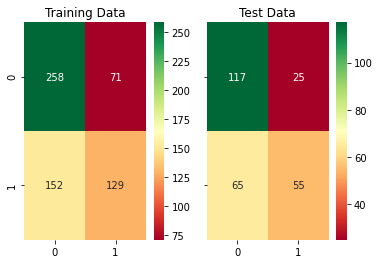

In [876]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train, ytrain_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, ytest_predict1)),annot=True,fmt='.5g',cmap='RdYlGn',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [878]:
# Inference:
# Logistic regression
#Confusion matrix on the training and test data
#Trainig data:
#True Negative : 265 False Positive : 61
#False Negative : 158 True Positive : 126
#Test data:
#True Negative : 113 False Positive : 32
#False Negative : 65 True Positive : 52

Classification Report of training and test data

In [880]:

print(classification_report(y_train, ytrain_predict1),'\n');
print(classification_report(y_test, ytest_predict1),'\n');

              precision    recall  f1-score   support

           0       0.63      0.78      0.70       329
           1       0.65      0.46      0.54       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 

              precision    recall  f1-score   support

           0       0.64      0.82      0.72       142
           1       0.69      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.66      0.66      0.64       262
 



AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


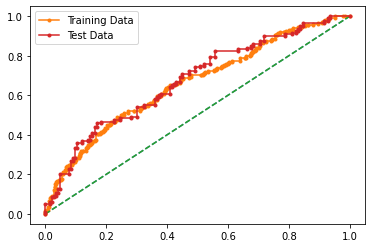

In [881]:
# AUC and ROC for the training data

# calculate AUC
train_auc_lr = metrics.roc_auc_score(y_train,ytrain_predict_prob1[:,1])
print('AUC for the Training Data: %.3f' % train_auc_lr)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,ytrain_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
test_auc_lr = metrics.roc_auc_score(y_test,ytest_predict_prob1[:,1])
print('AUC for the Test Data: %.3f' %test_auc_lr )

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,ytest_predict_prob1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [882]:
#Logistic regression
# Train Data:
### AUC: 66.7%
### Accuracy: 64%
### precision : 67%
#recall : 44%
#f1  :54%

# Test Data:
### AUC: 66.1%
### Accuracy: 63%
### precision  63
#recall : 44%
#f1 : 52%

#### Training and Test set results are almost similar,This proves no overfitting or underfitting
#### The Precision and Recall metrics also almost similiar between training and test set.

In [883]:
best_model.coef_

array([[-1.91139238e-05, -1.46564944e-02,  4.60884574e-02,
         0.00000000e+00,  1.94675838e-01,  1.04864498e+00]])

In [884]:
print("The intercept for the model is :",best_model.intercept_)

The intercept for the model is : [0.39891659]


In [885]:
 
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_model.coef_[0][idx]))

The coefficient for Salary is -1.9113923814581458e-05
The coefficient for age is -0.014656494359458759
The coefficient for educ is 0.04608845740689346
The coefficient for no_young_children is 0.0
The coefficient for no_older_children is 0.19467583759199986
The coefficient for foreign is 1.048644975581004


In [886]:
#The coefficients for each of the independent attributes

# The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
# If more foreign employees opted for holiday package ,no of employees opted for holiday_package will increase
# There is more negative correlation between "holiday package " and salary,age variables 

Feature: 0, Score: -0.00002
Feature: 1, Score: -0.01466
Feature: 2, Score: 0.04609
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.19468
Feature: 5, Score: 1.04864


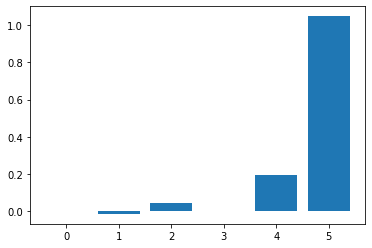

In [887]:
importance = best_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
#1.57584

In [888]:
feature_importances = (importance / sum(importance))*100

feature_importances

array([-1.49944450e-03, -1.14976915e+00,  3.61553623e+00,  0.00000000e+00,
        1.52718833e+01,  8.22638490e+01])

In [889]:
#1. foreign (+ve) – 84 % increase per unit

#2. educ (+ve) – 4.2 % increase per unit
#3. age (-ve) – .569 % decrease per unit
#5. no_older_children (+ve) -11.84 % decrease per unit

In [890]:
vif1 = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

C:\Users\rmand\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [891]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif1[i])
        i = i+1

Salary ---> 10.691328770445477
age ---> 7.883717090792149
educ ---> 9.289879244969368
no_young_children ---> nan
no_older_children ---> 1.8287587912872862
foreign ---> 1.3123489821120458


In [ ]:
#foreign and no older children are important variable

In [892]:
#foreign and no older children are important variable
metrics=classification_report(y_train, ytrain_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
train_precision_lr=round(df.loc["1"][0],2)
train_recall_lr=round(df.loc["1"][1],2)
train_f1_lr=round(df.loc["1"][2],2)
print ('LR_train_precision ',train_precision_lr)
print ('LR_train_recall ',train_recall_lr)
print ('LR_train_f1 ',train_f1_lr)

LR_train_precision  0.64
LR_train_recall  0.46
LR_train_f1  0.54


In [893]:
metrics=classification_report(y_test, ytest_predict1,output_dict=True)
df=pd.DataFrame(metrics).transpose()
test_precision_lr=round(df.loc["1"][0],2)
test_recall_lr=round(df.loc["1"][1],2)
test_f1_lr=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_lr)
print ('LR_test_recall ',test_recall_lr)
print ('LR_test_f1 ',test_f1_lr)

LR_test_precision  0.69
LR_test_recall  0.46
LR_test_f1  0.55


# LDA

In [905]:
# Linear Discriminate Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
# Refer details for LDA at http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
model1

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

In [906]:
# Predicting Train Data
# Predict it
# Predict it
pred_class = model1.predict(X_train)

In [921]:
print(classification_report(y_train, pred_class))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [917]:
# Confusion matrix on train data
#generate Confusion Matrix

confusion_matrix(y_train, pred_class)

array([[263,  66],
       [158, 123]], dtype=int64)

In [909]:
#Predicting Test data
model2=clf.fit(X_test,y_test)
model2

C:\Users\rmand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LinearDiscriminantAnalysis()

In [910]:
pred_class2 = model2.predict(X_test)

In [911]:
print(classification_report(y_test, pred_class2))

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.44      0.54       120

    accuracy                           0.65       262
   macro avg       0.66      0.64      0.63       262
weighted avg       0.66      0.65      0.64       262



In [912]:

confusion_matrix(y_test, pred_class2)

array([[118,  24],
       [ 67,  53]], dtype=int64)

In [928]:
print(classification_report(y_train, pred_class),'\n');
print(classification_report(y_test, pred_class2),'\n');

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.44      0.54       120

    accuracy                           0.65       262
   macro avg       0.66      0.64      0.63       262
weighted avg       0.66      0.65      0.64       262
 



# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
